# Working with Text data 
### All you need to know about NLP in python

In [2]:
import pandas as pd
import numpy as np

## Ploting Packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### NLP Packages
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from stop_words import get_stop_words
import re

### Wordcloud Modules
from wordcloud import WordCloud
from wordcloud import WordCloud,STOPWORDS

## Machine learning modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

C:\Users\DMuturi\AppData\Local\Continuum\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
## Importing the dataset
df=pd.read_csv("spam.csv",encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
## Droping the unceccesary columns and renaming 
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)
df.columns=["Class","Text"]
df["Lable"]=df.Class.map({"ham":0,"spam":1})
df.head()

,Class,Text,Lable
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [5]:
df.groupby('Class').describe(include='O')

Text                                                               
      count unique                                                top freq
Class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

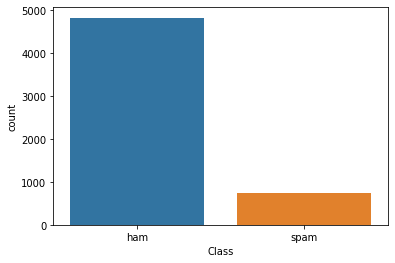

In [6]:
sns.countplot(data=df,x='Class')

## Frequent words in each class

In [7]:
Ham_texts=df.query("Class=='ham'")['Text']
Spam_texts=df.query("Class=='spam'")['Text']

In [8]:
def words_cleaner(data):
    words=[re.sub('[^a-zA-Z]', ' ',i) for i in df['Text']]
    words=[i.lower() for j in data for i in j.split()]### Spliting all the sentences into words
    words=[i for i in words if not i in set(stopwords.words('english'))]## removing stopwords
    words=[i for i in words if len(i)>2]## removing words with less than two characters
    return words

#### Creating a word map function

In [9]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor,max_words=100)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

##### Words common in ham messages

In [10]:
Ham_texts=df.query("Class=='ham'")['Text']# filtering ham words
ham_words=words_cleaner(Ham_texts)## cleaning using the function we created
ham_words_freq=nltk.FreqDist(ham_words)
ham_words_freq=pd.DataFrame(ham_words_freq.most_common(10),
                            columns=['Top_Words','Frequency'])

In [11]:
ham_words_freq

,Top_Words,Frequency
0,i'm,369
1,get,293
2,&lt;#&gt;,276
3,got,227
4,like,221
5,call,215
6,come,215
7,know,208
8,good,187
9,i'll,167


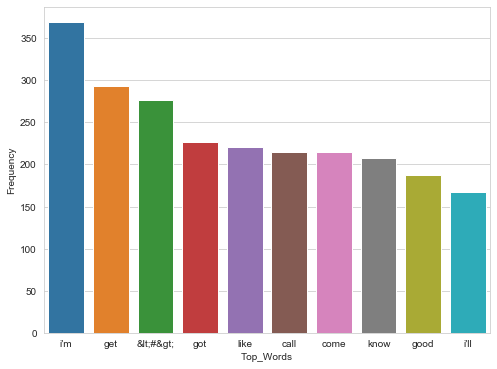

In [12]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
ax=sns.barplot(x='Top_Words',y='Frequency',data=ham_words_freq)

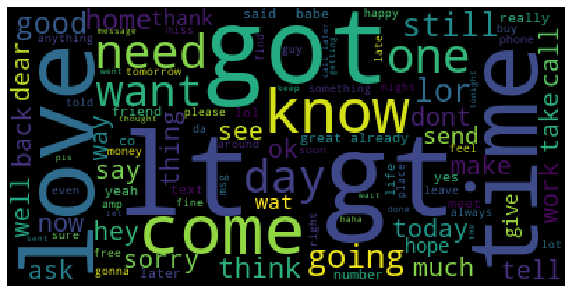

In [13]:
wc(ham_words,'black')

### Word cloud for spam texts

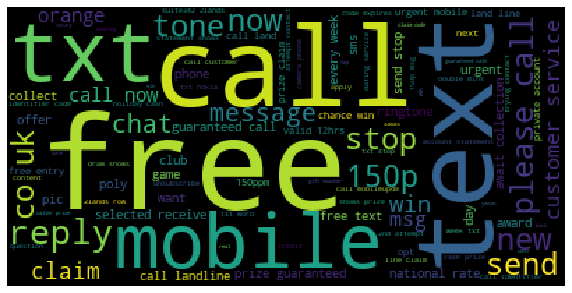

In [22]:
wc(words_cleaner(Spam_texts),'black')

### Machine Learning
Now we create a model to classify a message as either ham or spam.
Before creating a model we create a text cleaning function

In [15]:
def features_cleaner(data):
    clean_txt=[]
    for i in range(0,len(data)):
        text=re.sub('[^a-zA-Z]', ' ',data[i])
        text=text.lower()
        text=text.split()
        ps=PorterStemmer()
        text= [ps.stem(j) for j in text if not j in set(stopwords.words('english'))]
        text=' '.join(text)
        clean_txt.append(text) 
    return clean_txt

In [16]:
X=features_cleaner(df['Text'])
y=df['Lable']

In [17]:
for i in range(0,3):
    print(df['Text'][i])
print('********************************       After Cleaning      ********************************')
for i in range(0,3):
    print(X[i])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
********************************       After Cleaning      ********************************
go jurong point crazi avail bugi n great world la e buffet cine got amor wat
ok lar joke wif u oni
free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli


In [18]:
cv=CountVectorizer()
X=cv.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=50)

In [19]:
classifier=MultinomialNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [20]:
confusion_matrix(y_test,y_pred)

array([[1178,   15],
       [  16,  184]], dtype=int64)

In [21]:
accuracy_score(y_pred,y_test)

0.9777458722182341

Woow!! What a wonderful model.
it is $97.77\%$ accurate.

                                                      DMuturi